<a href="https://colab.research.google.com/github/deepraman-kaur/ML_Revision/blob/main/MLRevision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**

Linear Regression is one of the most fundamental algorithms used to model relationships between a dependent variable and one or more independent variables. In simpler terms, it involves finding the ‘line of best fit’ that represents two or more variables.
The line of best fit is found by minimizing the squared distances between the points and the line of best fit — this is known as minimizing the sum of squared residuals. A residual is simply equal to the predicted value minus the actual value.

There is a dependent variable, labeled Y, being predicted, and independent variables, labeled x1, x2, and so forth. These are the predictors. Y is a function of the X variables, and the regression model is a linear approximation of this function.

**reference** : https://365datascience.com/tutorials/python-tutorials/linear-regression/ 



**The basic assumptions of the Linear regression algorithm are as follows:**

1. **Linearity**: The relationship between the features and target.
2. **Homoscedasticity**: The error term has a constant variance.
3. **Multicollinearity**: There is no multicollinearity between the features.
4. **Independence**: Observations are independent of each other.
5. **Normality**: The error(residuals) follows a normal distribution.

In [ ]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/1.01. Simple linear regression.csv')

FileNotFoundError: ignored

In [ ]:
data.describe()

In [ ]:
y = data['GPA']
 
x1 = data['SAT']

In [ ]:
y

In [ ]:
x1

In [ ]:
plt.scatter(x1,y)
 
plt.xlabel('SAT', fontsize = 20)
 
plt.ylabel('GPA', fontsize = 20)
 
plt.show()

In [ ]:
x = sm.add_constant(x1)

In [ ]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

In [ ]:
plt.scatter(x1,y)
 
yhat = 0.0017*x1 + 0.275
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('SAT', fontsize = 20)
 
plt.ylabel('GPA', fontsize = 20)
 
plt.show()

## **K-nearest neighbors**

K-nearest neighbors is a simple idea. First, you start off with data that is already classified (i.e. the red and blue data points). Then when you add a new data point, you classify it by looking at the k nearest classified points. Whichever class gets the most votes determines what the new point gets classified as.
In this case, if we set k=1, we can see that the first nearest point to the grey sample is a red data point. Therefore, the point would be classified as red.
Something to keep in mind is that if the value of k is set too low, it can be subject to outliers. On the other hand, if the value of k is set too high then it might overlook classes with only a few samples.

## KNN as Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[25  0  0]
 [ 0 15  1]
 [ 0  0 19]]

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Accuracy: 0.9833333333333333


## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[25  0  0]
 [ 0 15  1]
 [ 0  1 18]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.97        60
      macro avg       0.96      0.96      0.96        60
   weighted avg       0.97      0.97      0.97        60

Accuracy: 0.9666666666666667


Scaling:

**Normalisation (Min-Max Scaling)**: In this approach we'll scale down the values of the features between 0 and 1.

                Xnorm =  (X - Xmin)/(Xmax-Xmin)



**Standaedization (Z-score Normalisation)** : Here all the fetures will be transformed in such a way that it will have the properties of a standard normal distribution with mean(μ)=0 and standard deviation (σ)=1

                  z = (x-μ)/ σ


**Bias and Variance Tradeoff**: https://www.youtube.com/watch?v=BqzgUnrNhFM

## KNN as Regressor

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
data = pd.read_csv(path, names = headernames)
array = data.values
X = array[:,:2]
Y = array[:,2]
data.shape


(150, 5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 10)
knnr.fit(X, Y)

NameError: ignored

## Decision Tree Algo

https://www.youtube.com/watch?v=lYwf1-causo&t=187s

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# pima.drop(pima.head(1).index, inplace=True)

In [ ]:
pima.head(1)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

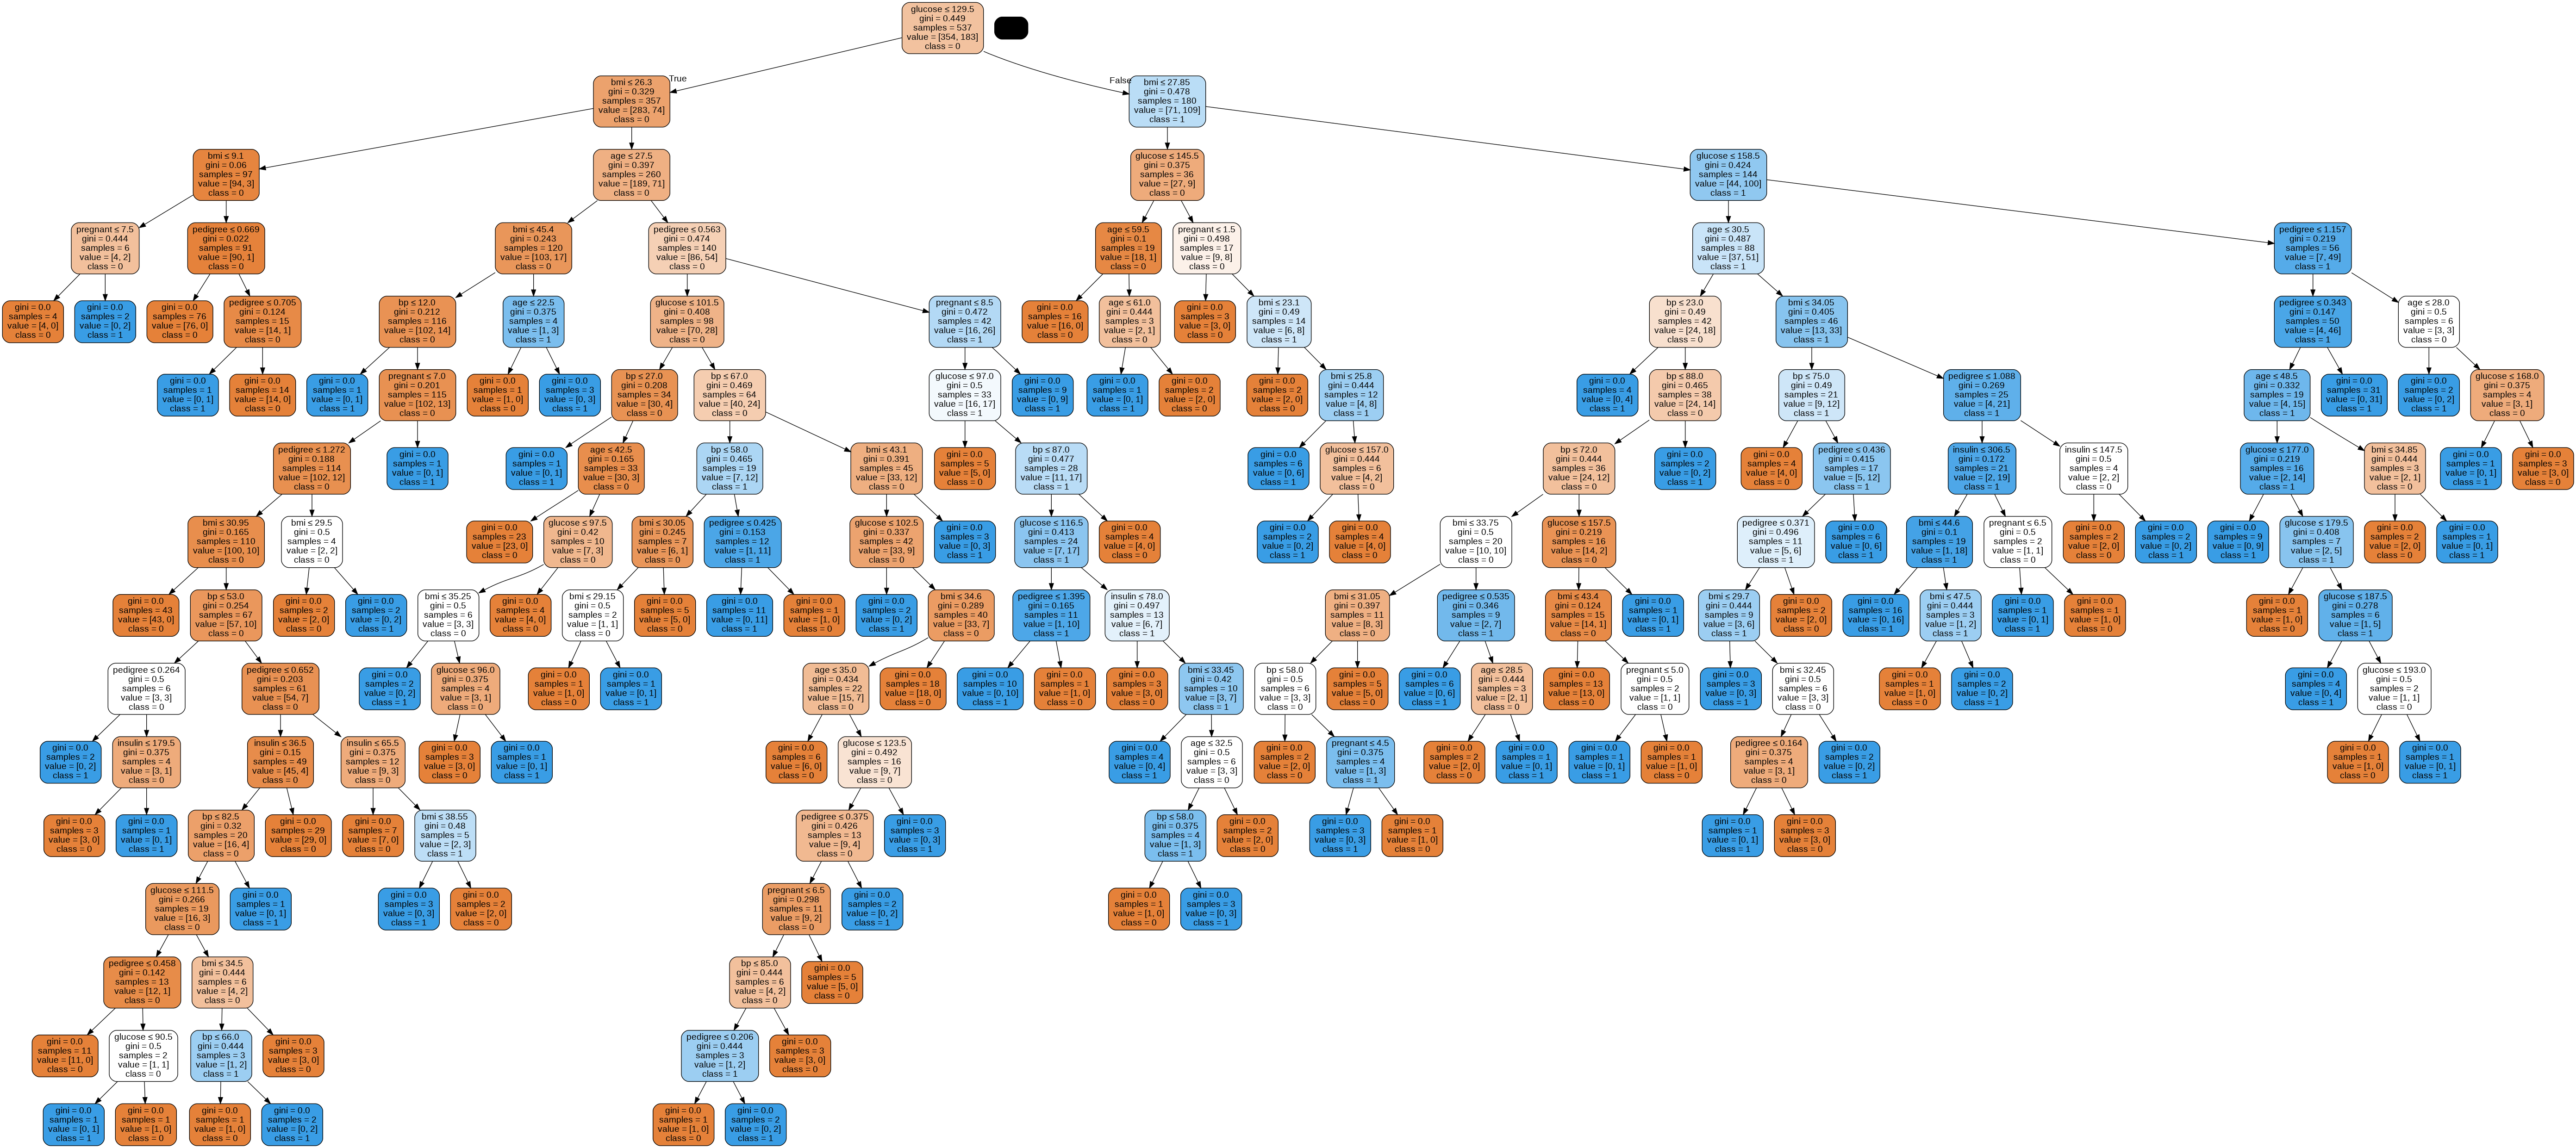

In [ ]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## **Hyperparameter**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878
